# **Proposta de Trabalho 3 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:** Júlio César de Paula Ferreira
### **Matrícula:** 2020054609


### **Tema:** Classificação - Classificação de *score* de cartão de crédito
### **Base de dados:** (https://www.kaggle.com/datasets/parisrohan/credit-score-classification)


In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import re

##**2. Data understanding (Entendimento dos dados)**


Descrição e filtragem da base de dados, são analisados 28 atributos e 100000 entradas de dados

In [ ]:
#Carregando a base de dados

In [ ]:
df = pd.read_csv('train.csv',sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.dropna()
len(df)

63615

O primeiro processo que precisa ser realizado é a limpeza dos dados, alguns dados como ocupação, idade, balanço mensal, renda anual, etc possuem caracteres especiais não esperados ou não estão no formato correto. O primeiro ponto de correção é remover esses caracteres e transformar os valores para os formatos corretos.

In [ ]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [ ]:
df['Occupation'] = df.Occupation.replace('_______',None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df[pd.to_numeric(df['Age'], errors='coerce', downcast="integer").notnull()]
df['Age'] = pd.to_numeric(df['Age'])
df = df[pd.to_numeric(df['Monthly_Balance'], errors='coerce').notnull()]
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'])
df = df[pd.to_numeric(df['Annual_Income'], errors='coerce').notnull()]
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'])
df = df[pd.to_numeric(df['Num_of_Loan'], errors='coerce').notnull()]
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'])
df = df[pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').notnull()]
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'])
df = df[pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').notnull()]
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])
df = df[pd.to_numeric(df['Outstanding_Debt'], errors='coerce').notnull()]
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'])
df = df[pd.to_numeric(df['Amount_invested_monthly'], errors='coerce').notnull()]
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
df['Credit_Mix'] = df.Credit_Mix.replace('_',None)
df.Credit_Mix[df.Credit_Mix=='_']

0    _
Name: Credit_Mix, dtype: object

In [ ]:
df = df.drop(0)

In [ ]:
df['Payment_Behaviour'] = df.Payment_Behaviour.replace('!@9#%8',None)

O ID está em hexadecimal, portanto é preciso transformá-lo em inteiro

In [ ]:
df['ID'] = df['ID'].apply(int, base=16)

In [ ]:
df = df.dropna()
df_visualization = df.copy()

In [ ]:
df_visualization.describe()

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,48172.000000,48172.000000,4.817200e+04,48172.000000,48172.000000,48172.000000,48172.000000,48172.00000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000
mean,80453.251079,110.075313,1.809943e+05,3882.245418,17.262310,23.382006,76.830316,3.12827,21.987648,31.742859,10.720256,26.869613,1509.957619,32.197538,1431.428977,181.639311,382.302199
std,43177.710830,688.891006,1.479915e+06,2872.633569,117.695853,131.711519,482.152742,62.04194,15.261736,228.381940,6.888445,186.008367,1189.730622,5.062767,8360.195602,176.425270,195.528478
min,5637.000000,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.00000,-5.000000,-3.000000,-6.450000,0.000000,0.230000,20.881250,4.462837,0.000000,0.007760
25%,43128.750000,24.000000,1.882202e+04,1711.880000,4.000000,4.000000,8.000000,2.00000,10.000000,9.000000,5.607500,3.000000,609.130000,28.001163,41.167536,69.843829,264.715741
50%,80391.000000,33.000000,3.597424e+04,3093.745000,6.000000,6.000000,15.000000,3.00000,19.000000,14.000000,9.700000,6.000000,1241.690000,32.225696,78.271158,123.886696,325.107559
75%,117789.000000,42.000000,6.986261e+04,5143.676875,8.000000,7.000000,22.000000,6.00000,29.000000,19.000000,15.442500,9.000000,2132.130000,36.387248,169.483113,223.595540,444.411673
max,155627.000000,8697.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1485.00000,67.000000,4397.000000,36.970000,2594.000000,4998.070000,49.564519,82256.000000,1572.803231,1552.946094


Algumas visualizações ajudam a entender a dinâmica dos dados, como esperado, existem muitos valores outliers mas ainda dentro do previsto, visto que são dados financeiros, entretanto, a coluna idade possui valores não esperados (idades maiores que 100 anos) e deverá ser corrigida a frente.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa56c983c90>,
      dtype=object)

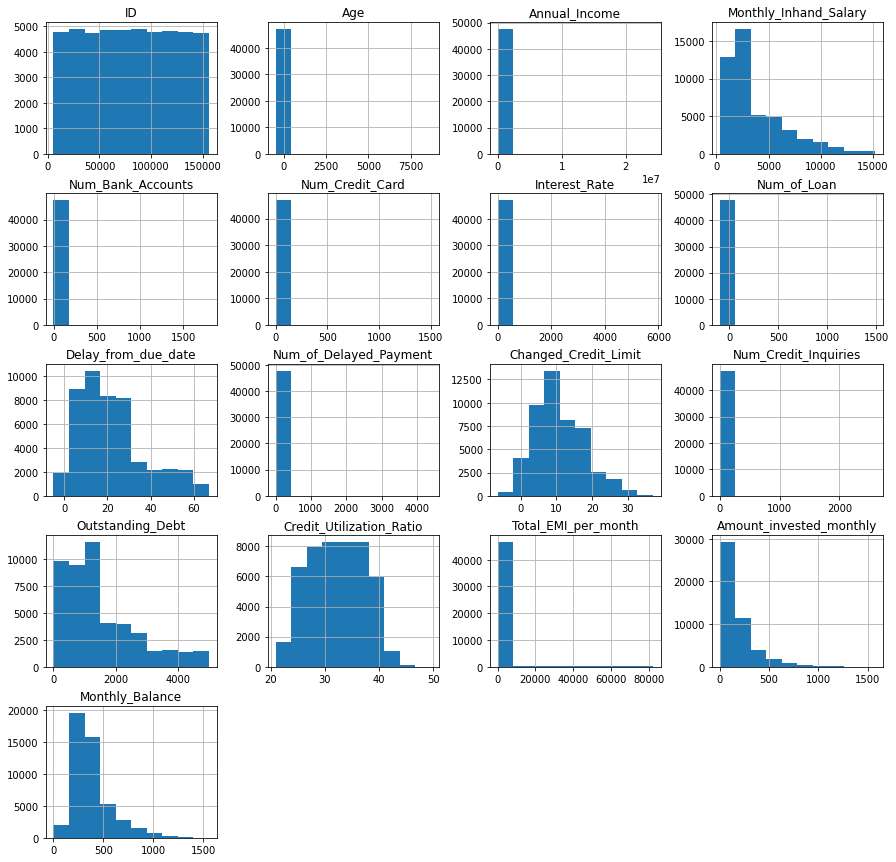

In [ ]:
df_visualization.hist(figsize=(15,15))

Nos dados abaixo, é possível extrair alguns dados importantes. Em primeiro lugar a distribuição por Score na base de dados não é uniforme e não parece ser aleatória, além disso a profissão e o mês são uniformemente distribuídos.

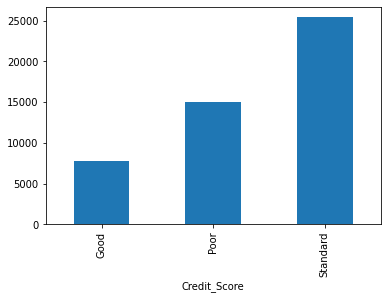

In [ ]:
df_visualization.groupby("Credit_Score").count()['ID'].plot.bar(x='Credit_Score',y='ID')

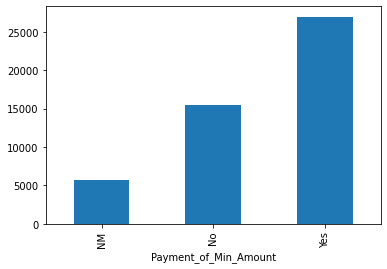

In [ ]:
df_visualization.groupby("Payment_of_Min_Amount").count()['ID'].plot.bar(x='Payment_of_Min_Amount',y='ID')

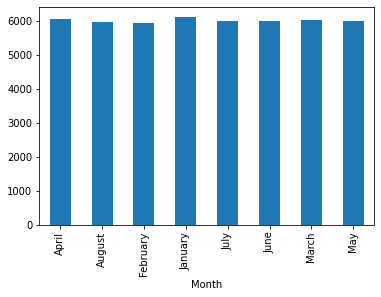

In [ ]:
df_visualization.groupby("Month").count()['ID'].plot.bar(x='Month',y='ID')

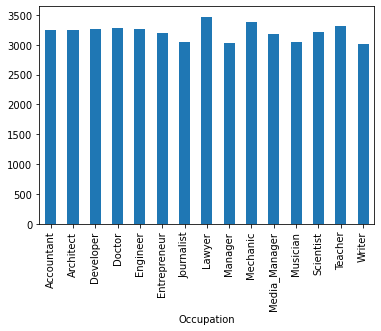

In [ ]:
df_visualization.groupby("Occupation").count()['ID'].plot.bar(x='Occupation',y='ID')

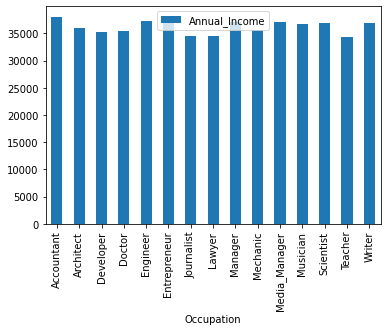

In [ ]:
df_visualization[['Occupation','Annual_Income']].groupby('Occupation').median().reset_index().plot.bar(x='Occupation',y='Annual_Income')

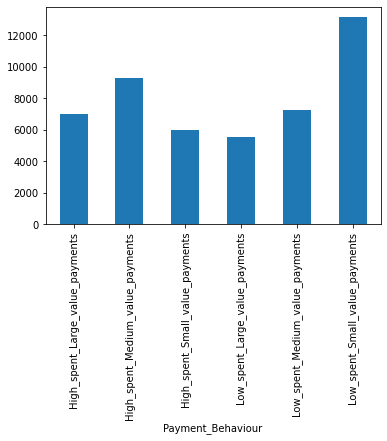

In [ ]:
df_visualization.groupby("Payment_Behaviour").count()['ID'].plot.bar(x='Payment_Behaviour',y='ID')

In [ ]:
df_visualization['Type_of_Loan']

3        Auto Loan, Credit-Builder Loan, Personal Loan,...
5        Auto Loan, Credit-Builder Loan, Personal Loan,...
9                                      Credit-Builder Loan
12                                     Credit-Builder Loan
13                                     Credit-Builder Loan
                               ...                        
99991    Personal Loan, Auto Loan, Mortgage Loan, Stude...
99994                          Auto Loan, and Student Loan
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 48172, dtype: object

In [ ]:
df_visualization.select_dtypes(include=[np.number])

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
3,5637,23,19114.12,3093.745000,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
5,5639,23,19114.12,3093.745000,3,4,3,4,8,4,9.27,4.0,809.98,27.262259,49.574949,62.430172,340.479212
9,5647,28,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.0,605.03,38.550848,18.816215,40.391238,484.591214
12,5650,28,34847.84,3037.986667,2,4,6,1,3,1,6.42,2.0,605.03,34.977895,18.816215,130.115420,444.867032
13,5651,28,34847.84,3037.986667,2,4,6,1,3,0,5.42,2.0,605.03,33.381010,18.816215,43.477190,481.505262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,155617,29,20002.88,1929.906667,10,8,29,5,33,25,18.31,9.0,3571.70,37.140784,60.964772,34.662906,337.362988
99994,155624,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,3.0,502.38,39.323569,35.104023,140.581403,410.256158
99995,155625,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228
99996,155626,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610


In [ ]:
df_visualization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48172 entries, 3 to 99997
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        48172 non-null  int64  
 1   Customer_ID               48172 non-null  object 
 2   Month                     48172 non-null  object 
 3   Name                      48172 non-null  object 
 4   Age                       48172 non-null  int64  
 5   SSN                       48172 non-null  object 
 6   Occupation                48172 non-null  object 
 7   Annual_Income             48172 non-null  float64
 8   Monthly_Inhand_Salary     48172 non-null  float64
 9   Num_Bank_Accounts         48172 non-null  int64  
 10  Num_Credit_Card           48172 non-null  int64  
 11  Interest_Rate             48172 non-null  int64  
 12  Num_of_Loan               48172 non-null  int64  
 13  Type_of_Loan              48172 non-null  object 
 14  Delay_

Gerando o mapa de calor da correlação, é perceptível que a grande maioria dos dados está pouco correlacionado, com a maioria dos valores na faixa de 0.1-0.4. Algumas outras informações serão incluídas na etapa de preparação para entender a correlação que alguns dos dados abaixo deveriam ter na realidade.

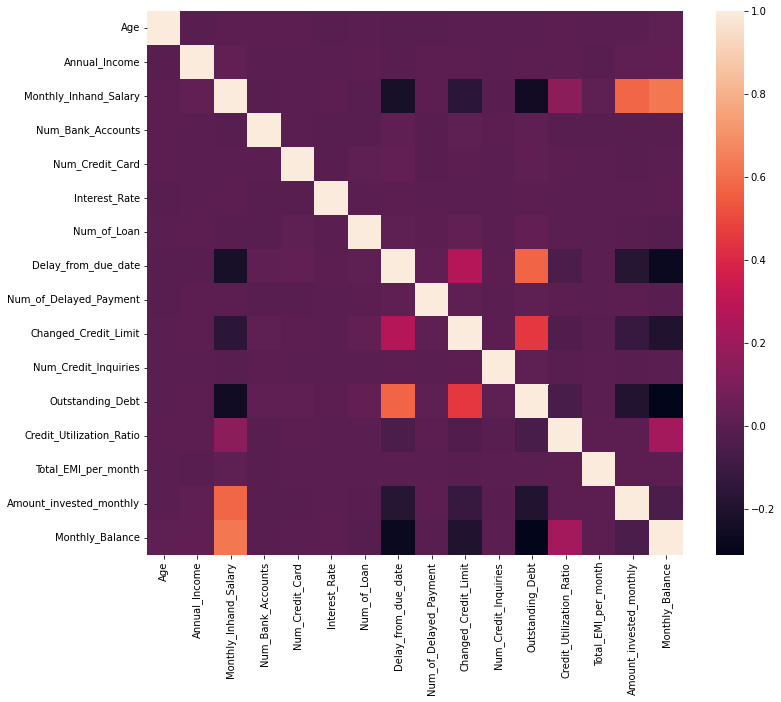

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_visualization.select_dtypes(include=[np.number]).drop(columns='ID').corr())

##**3. Data preparation (Preparação dos dados)**

É criada uma cópia dos dados e realizado o tratamento, algumas colunas, com identificadores, dados muito uniformes e sensíveis são removidos. Além disso é feito o tratamento de algumas informações categóricas é feito, para transformá-las em números

In [ ]:
df_total = df.copy()

In [ ]:
df_total['Occupation_Code'] = pd.Categorical(df_total['Occupation']).codes

In [ ]:
df_total = df_total.drop(columns=['Customer_ID','Name','SSN','Age','Type_of_Loan','Month','Occupation','ID'])

In [ ]:
pd.set_option('display.max_columns', 24)
df_total.describe()


,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Code
count,4.817200e+04,48172.000000,48172.000000,48172.000000,48172.000000,48172.00000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000,48172.000000
mean,1.809943e+05,3882.245418,17.262310,23.382006,76.830316,3.12827,21.987648,31.742859,10.720256,26.869613,1509.957619,32.197538,1431.428977,181.639311,382.302199,6.952275
std,1.479915e+06,2872.633569,117.695853,131.711519,482.152742,62.04194,15.261736,228.381940,6.888445,186.008367,1189.730622,5.062767,8360.195602,176.425270,195.528478,4.311709
min,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.00000,-5.000000,-3.000000,-6.450000,0.000000,0.230000,20.881250,4.462837,0.000000,0.007760,0.000000
25%,1.882202e+04,1711.880000,4.000000,4.000000,8.000000,2.00000,10.000000,9.000000,5.607500,3.000000,609.130000,28.001163,41.167536,69.843829,264.715741,3.000000
50%,3.597424e+04,3093.745000,6.000000,6.000000,15.000000,3.00000,19.000000,14.000000,9.700000,6.000000,1241.690000,32.225696,78.271158,123.886696,325.107559,7.000000
75%,6.986261e+04,5143.676875,8.000000,7.000000,22.000000,6.00000,29.000000,19.000000,15.442500,9.000000,2132.130000,36.387248,169.483113,223.595540,444.411673,11.000000
max,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1485.00000,67.000000,4397.000000,36.970000,2594.000000,4998.070000,49.564519,82256.000000,1572.803231,1552.946094,14.000000


In [ ]:
df_total['Num_Bank_Accounts'] = df_total['Num_Bank_Accounts'].clip(lower=0)
df_total['Num_of_Loan'] = df_total['Num_of_Loan'].clip(lower=0)
df_total['Delay_from_due_date'] = df_total['Delay_from_due_date'].clip(lower=0)
df_total['Num_of_Delayed_Payment'] = df_total['Num_of_Delayed_Payment'].clip(lower=0)

In [ ]:
df_total['Percentage_Invested'] = df_total['Amount_invested_monthly']/df_total['Annual_Income']

In [ ]:
df_total['Cards_Per_Bank'] = df_total['Num_Credit_Card']/df_total['Num_Bank_Accounts']

In [ ]:
df_total['Cards_Per_Bank'].replace([np.inf,-np.inf],0, inplace=True)

In [ ]:
df_total['Loans_Per_Bank'] = (df_total['Num_of_Loan']/df_total['Num_Bank_Accounts'])

In [ ]:
df_total['Loans_Per_Bank'].replace([np.inf,-np.inf],0, inplace=True)

In [ ]:
df_total['Payment_of_Min_Amount'] = df_total['Payment_of_Min_Amount'].replace("NM","No")

In [ ]:
df_total['Credit_Score'] = df_total['Credit_Score'].replace({'Good':3,'Poor':1,'Standard':2})

In [ ]:
df_total['Payment_Behaviour'] = df_total['Payment_Behaviour'].replace(
    {'High_spent_Large_value_payments':6,'High_spent_Medium_value_payments':5,
     'High_spent_Small_value_payments':4,'Low_spent_Large_value_payments':3,
     'Low_spent_Medium_value_payments':2,'Low_spent_Small_value_payments':1})

In [ ]:
df_total['Credit_Mix'] = df_total['Credit_Mix'].replace(
    {'Good':3,'Standard':2,
     'Bad':1})

O campo de histórico de crédito é convertido em um valor numérico indicando a idade do histórico.

In [ ]:
import re
def convert_to_months(word):
  year = re.findall(r'(\d+(?:\.\d+)?) Years', word)
  month = re.findall(r'(\d+(?:\.\d+)?) Months', word)
  total = int(year[0])*12+int(month[0])
  return total

df_total['Credit_History_Age'] = df_total['Credit_History_Age'].apply(lambda x: convert_to_months(x))

In [ ]:
df_total['Payment_of_Min_Amount'] = df_total['Payment_of_Min_Amount'].replace(
    {'Yes':1,'No':0})

In [ ]:
df_total = df_total.dropna()

In [ ]:
columns = np.concatenate((df_total.columns[0:19],df_total.columns[20:24],['Credit_Score']))

In [ ]:
df_total

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Code,Percentage_Invested,Cards_Per_Bank,Loans_Per_Bank
3,19114.12,3093.745000,3,4,3,4,5,4,6.27,4.0,3,809.98,31.377862,268,0,49.574949,199.458074,1,223.451310,3,12,0.010435,1.333333,1.333333
5,19114.12,3093.745000,3,4,3,4,8,4,9.27,4.0,3,809.98,27.262259,270,0,49.574949,62.430172,1,340.479212,3,12,0.003266,1.333333,1.333333
9,34847.84,3037.986667,2,4,6,1,7,1,7.42,2.0,3,605.03,38.550848,320,0,18.816215,40.391238,6,484.591214,3,13,0.001159,2.000000,0.500000
12,34847.84,3037.986667,2,4,6,1,3,1,6.42,2.0,3,605.03,34.977895,323,0,18.816215,130.115420,1,444.867032,3,13,0.003734,2.000000,0.500000
13,34847.84,3037.986667,2,4,6,1,3,0,5.42,2.0,3,605.03,33.381010,324,0,18.816215,43.477190,6,481.505262,3,13,0.001248,2.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,20002.88,1929.906667,10,8,29,5,33,25,18.31,9.0,1,3571.70,37.140784,75,1,60.964772,34.662906,6,337.362988,2,1,0.001733,0.800000,0.500000
99994,39628.99,3359.415833,4,6,7,2,20,6,9.50,3.0,1,502.38,39.323569,377,0,35.104023,140.581403,5,410.256158,1,9,0.003547,1.500000,0.500000
99995,39628.99,3359.415833,4,6,7,2,23,7,11.50,3.0,1,502.38,34.663572,378,0,35.104023,60.971333,6,479.866228,1,9,0.001539,1.500000,0.500000
99996,39628.99,3359.415833,4,6,7,2,18,7,11.50,3.0,1,502.38,40.565631,379,0,35.104023,54.185950,5,496.651610,1,9,0.001367,1.500000,0.500000


A base de dados é dividida em 80% de treino e 20% de teste, os dados são então transformados em arrays

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_total.drop(columns='Credit_Score'),df_total.Credit_Score,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(38464, 23)

In [ ]:
X_train,X_test = np.array(X_train),np.array(X_test)

In [ ]:
y_train,y_test = np.array(y_train),np.array(y_test)

##**4. Modeling (Modelagem)**

A tunagem de hiperparâmetros é realizada com Grid Search, o algoritmo utilizado para o modelo é o Random Forest Classifier, que apresenta bons resultados para esse tipo de base de dados

In [ ]:
param_grid = {
    'n_estimators': [10,20,50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10,12],
    'criterion' :['gini', 'entropy']
}
random_forest=RandomForestClassifier(random_state=42)

In [ ]:
cv = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5,verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.606 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.620 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.615 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.603 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.604 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=20;, score=0.605 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=20;, score=0.615 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=20;, score=0.607 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=2, max_features=au

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 150]},
             verbose=3)

Pelos gráficos abaixo, podemos encontrar os melhores valores para cada um dos parametros procurados, além disso, é possível perceber que após um certo número, o ganho de precisão é muito baixo a medida que os parâmetros são alterados, mostrando que não é muito útil testar uma combinação maior de hiperparâmetros.

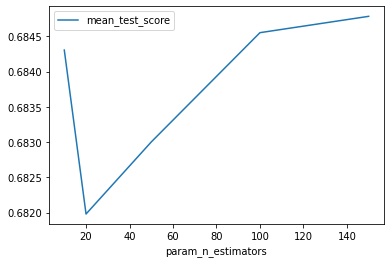

In [ ]:
df_results = pd.DataFrame(cv.cv_results_)
df_results[['param_n_estimators','mean_test_score']].groupby('param_n_estimators').mean().plot()

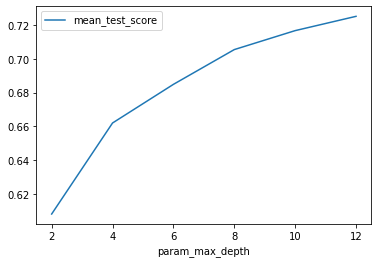

In [ ]:
df_results[['param_max_depth','mean_test_score']].groupby('param_max_depth').mean().plot()

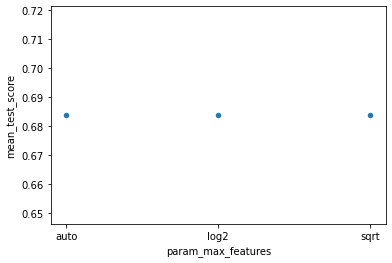

In [ ]:
df_results[['param_max_features','mean_test_score']].groupby(
                                        'param_max_features').mean().reset_index().plot.scatter(x='param_max_features',y='mean_test_score')

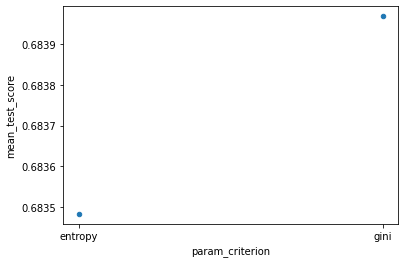

In [ ]:
df_results[['param_criterion','mean_test_score']].groupby(
    'param_criterion').mean().reset_index().plot.scatter(x='param_criterion',y='mean_test_score')

In [ ]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.292678,0.052477,0.010744,0.003450,gini,2,auto,10,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.606395,0.620044,0.615495,0.603406,0.604264,0.609921,0.006640,154
1,0.659880,0.072437,0.027671,0.011718,gini,2,auto,20,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.605226,0.615235,0.606915,0.592097,0.598284,0.603551,0.007869,175
2,1.934053,0.083763,0.089804,0.036185,gini,2,auto,50,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.605096,0.614325,0.605356,0.592357,0.602444,0.603915,0.007037,172
3,2.092487,0.720530,0.071961,0.029324,gini,2,auto,100,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.610295,0.616145,0.612115,0.599636,0.602704,0.608179,0.006105,160
4,2.597887,0.015999,0.086152,0.002879,gini,2,auto,150,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.609905,0.617444,0.614455,0.600546,0.605044,0.609479,0.006130,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.146074,0.016531,0.014929,0.000127,entropy,12,log2,10,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.719225,0.723125,0.716236,0.716236,0.713209,0.717606,0.003352,34
176,2.303707,0.027316,0.027417,0.000319,entropy,12,log2,20,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.724815,0.728324,0.722215,0.721565,0.722309,0.723846,0.002499,19
177,5.693848,0.015307,0.067720,0.001165,entropy,12,log2,50,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.725855,0.729624,0.726245,0.728194,0.726729,0.727329,0.001395,13
178,11.252425,0.047541,0.128115,0.001241,entropy,12,log2,100,"{'criterion': 'entropy', 'max_depth': 12, 'max...",0.729104,0.731184,0.726505,0.725855,0.729849,0.728499,0.002018,7


In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 150}

In [ ]:
#clf = RandomForestClassifier(**cv.best_params_)
clf = RandomForestClassifier(max_depth=12, n_estimators=150)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=150)

In [ ]:
y_pred = clf.predict(X_test)

O resultado do modelo foi uma precisão próxima a 73%, um valor que atende os requisitos do projeto

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7318290527191432


##**5. Evaluation (Validação) e Resultados**


Para validar a precisão do teste foi realizada uma validação cruzada com K-Fold, que retornou resultados dentro da faixa esperada e muito próxima a precisão do modelo usando o conjunto de dados base, indicando que ele é estável

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Precisão média da validação cruzada: %.2f' % (np.mean(scores)*100))

O último fator importante é que as confusões se concentraram majoritariamente nos casos de Bad/Standard e Good/Standard, os casos extremos Bad/Good corresponderam apenas a cerca de 2% dos valores

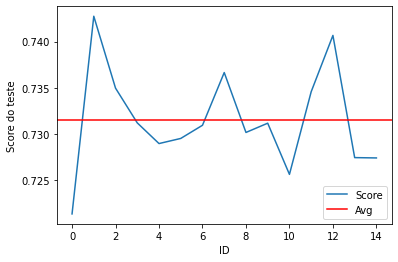

In [ ]:
plt.plot(scores,label="Score")
plt.xlabel("ID")
plt.ylabel("Score do teste")
plt.axhline(y=np.mean(scores),color='red',label="Avg")
plt.legend()
plt.show()

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
labels=["Bad","Standard","Good"]

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
X_Test_visualization = pd.DataFrame(X_test)
X_Test_visualization['Credit_Score'] = y_pred.astype(np.int32)

In [ ]:
X_Test_visualization.columns = columns

In [ ]:
df_grouped = X_Test_visualization.groupby('Credit_Score').median()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,3))
for i in range(5):
  df_grouped.iloc[:,i].plot(x="Credit_Score",y=df_grouped.iloc[:,i].name,label=df_grouped.iloc[:,i].name,ax=axes[i])
  axes[i].legend(loc="upper right")

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,3))
for i in range(5,10):
  df_grouped.iloc[:,i].plot(x="Credit_Score",y=df_grouped.iloc[:,i].name,label=df_grouped.iloc[:,i].name,ax=axes[i-5])
  axes[i-5].legend(loc="upper right")

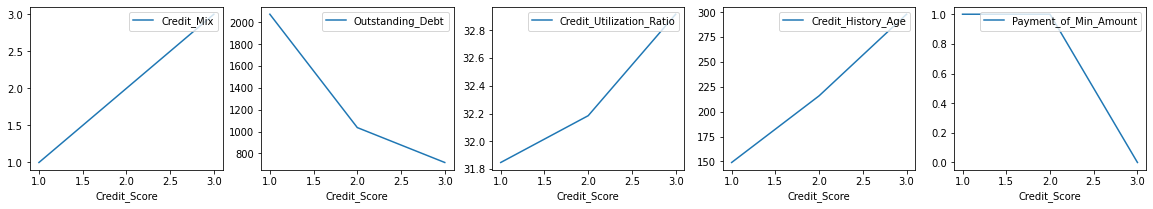

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,3))
for i in range(10,15):
  df_grouped.iloc[:,i].plot(x="Credit_Score",y=df_grouped.iloc[:,i].name,label=df_grouped.iloc[:,i].name,ax=axes[i-10])
  axes[i-10].legend(loc="upper right")

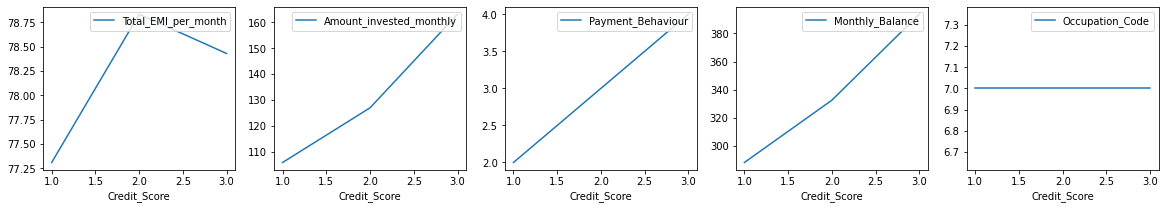

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,3))
for i in range(15,20):
  df_grouped.iloc[:,i].plot(x="Credit_Score",y=df_grouped.iloc[:,i].name,label=df_grouped.iloc[:,i].name,ax=axes[i-15])
  axes[i-15].legend(loc="upper right")

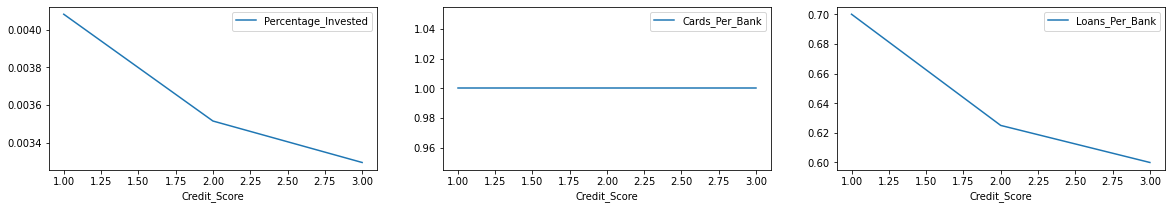

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,3))
for i in range(20,23):
  df_grouped.iloc[:,i].plot(x="Credit_Score",y=df_grouped.iloc[:,i].name,label=df_grouped.iloc[:,i].name,ax=axes[i-20])
  axes[i-20].legend(loc="upper right")